** Data Cleaning & Feature Engineering**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

df = pd.read_csv("/content/ev_charging_patterns_old.csv")
df.head()


,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [40]:
df.shape

(1320, 20)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [42]:
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [43]:
df.isnull().sum()

,0
User ID,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),66
Charging Duration (hours),0
Charging Rate (kW),66


In [44]:
df_clean = df.copy()

In [45]:
df_clean['Charging Start Time'] = pd.to_datetime(df_clean['Charging Start Time'])
df_clean['Charging End Time'] = pd.to_datetime(df_clean['Charging End Time'])


In [46]:
# Recalculate duration (hours)
df_clean['calculated_duration_hours'] = (
    df_clean['Charging End Time'] - df_clean['Charging Start Time']
).dt.total_seconds() / 3600


In [47]:
df_clean[['Charging Duration (hours)', 'calculated_duration_hours']].head()


,Charging Duration (hours),calculated_duration_hours
0,0.591363,0.650000
1,3.133652,2.016667
2,2.452653,2.800000
3,1.266431,3.700000
4,2.019765,1.766667


In [48]:
df_clean['charging_hour'] = df_clean['Charging Start Time'].dt.hour
df_clean['charging_day'] = df_clean['Charging Start Time'].dt.day
df_clean['charging_month'] = df_clean['Charging Start Time'].dt.month
df_clean['charging_year'] = df_clean['Charging Start Time'].dt.year
df_clean['charging_weekday'] = df_clean['Charging Start Time'].dt.day_name()

In [49]:
def peak_time(hour):
    if 7 <= hour <= 10 or 17 <= hour <= 21:
        return 'Peak'
    else:
        return 'Off-Peak'

df_clean['peak_period'] = df_clean['charging_hour'].apply(peak_time)

In [50]:
df_clean['station_city'] = df_clean['Charging Station Location']

In [51]:
# Sessions count (each row = 1 demand)
df_clean['session_count'] = 1

In [52]:
# Energy demand proxy
df_clean['energy_demand_kwh'] = df_clean['Energy Consumed (kWh)']

In [53]:
df_clean.isnull().sum()

,0
User ID,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),66
Charging Duration (hours),0
Charging Rate (kW),66


In [54]:
df_clean = df_clean.dropna()

In [55]:
# Replace charger types
df_clean['Charger Type'] = df_clean['Charger Type'].replace({
    'Level 1': 'Slow',
    'Level 2': 'Standard',
    'DC Fast Charger': 'Fast'
})

# Check the result
df_clean['Charger Type'].value_counts()


,count
Charger Type,
Slow,397
Fast,369
Standard,365


In [56]:
df_clean.head(100)

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,calculated_duration_hours,charging_hour,charging_day,charging_month,charging_year,charging_weekday,peak_period,station_city,session_count,energy_demand_kwh
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,Fast,Commuter,0.650000,0,1,1,2024,Monday,Off-Peak,Houston,1,60.712346
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Slow,Casual Driver,2.016667,1,1,1,2024,Monday,Off-Peak,San Francisco,1,12.339275
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Standard,Commuter,2.800000,2,1,1,2024,Monday,Off-Peak,San Francisco,1,19.128876
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Slow,Long-Distance Traveler,3.700000,3,1,1,2024,Monday,Off-Peak,Houston,1,79.457824
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Slow,Long-Distance Traveler,1.766667,4,1,1,2024,Monday,Off-Peak,Los Angeles,1,19.629104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,User_109,Chevy Bolt,50.000000,Station_191,San Francisco,2024-01-05 12:00:00,2024-01-05 13:34:00,13.262909,3.069015,47.670471,32.909305,Afternoon,Thursday,24.998950,90.020001,220.673856,31.873334,3.0,Fast,Commuter,1.566667,12,5,1,2024,Friday,Off-Peak,San Francisco,1,13.262909
110,User_111,Tesla Model 3,62.000000,Station_170,Los Angeles,2024-01-05 14:00:00,2024-01-05 17:27:00,27.425951,0.911152,32.165015,19.781386,Evening,Tuesday,74.647167,10.080074,216.070278,-4.153203,5.0,Slow,Long-Distance Traveler,3.450000,14,5,1,2024,Friday,Off-Peak,Los Angeles,1,27.425951
111,User_112,Chevy Bolt,100.000000,Station_307,Chicago,2024-01-05 15:00:00,2024-01-05 15:51:00,7.358447,2.430793,11.480486,13.786796,Afternoon,Monday,77.489903,71.628015,166.673967,-7.811349,5.0,Standard,Commuter,0.850000,15,5,1,2024,Friday,Off-Peak,Chicago,1,7.358447
112,User_113,Hyundai Kona,100.000000,Station_448,Houston,2024-01-05 16:00:00,2024-01-05 18:14:00,36.137269,2.449346,36.377076,7.870918,Night,Sunday,48.612193,95.831199,48.116981,32.307338,1.0,Fast,Casual Driver,2.233333,16,5,1,2024,Friday,Off-Peak,Houston,1,36.137269


In [57]:
df_clean.shape

(1131, 30)

In [58]:
#KEY KPIs (Always start with KPIs)
total_sessions = df_clean['session_count'].sum()
total_energy = df_clean['energy_demand_kwh'].sum()
avg_session_energy = df_clean['energy_demand_kwh'].mean()

total_sessions, total_energy, avg_session_energy

(np.int64(1131), np.float64(48537.62062567153), np.float64(42.91566810404203))

In [59]:
#Peak Charging Hours
hourly_demand = df_clean.groupby('charging_hour')['session_count'].sum()
hourly_demand

,session_count
charging_hour,
0,40
1,45
2,53
3,49
4,41
5,48
6,48
7,48
8,50


<Axes: title={'center': 'Charging Demand by Hour'}, xlabel='charging_hour'>

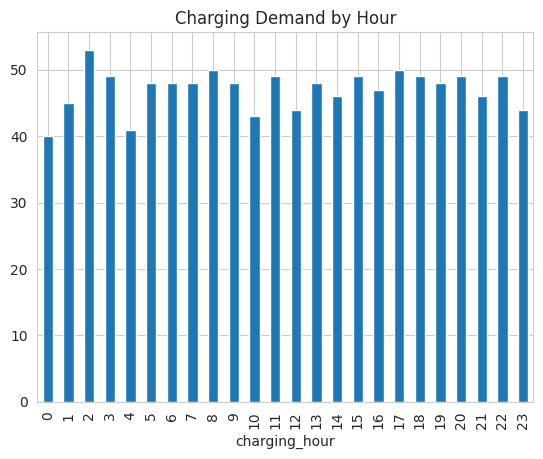

In [60]:
hourly_demand.plot(kind='bar', title='Charging Demand by Hour')

In [61]:
#User Type Behavior Analysis
user_demand = (
    df_clean.groupby('User Type')['energy_demand_kwh']
    .mean()
    .sort_values(ascending=False)
)
user_demand

,energy_demand_kwh
User Type,
Casual Driver,44.489488
Long-Distance Traveler,43.117393
Commuter,41.377552


In [62]:
#Charger Type vs Demand
charger_demand = (
    df_clean.groupby('Charger Type')['energy_demand_kwh']
    .mean()
)
charger_demand

,energy_demand_kwh
Charger Type,
Fast,41.735742
Slow,42.452447
Standard,44.612357


<Axes: title={'center': 'Energy Demand by Charger Type'}, xlabel='Charger Type'>

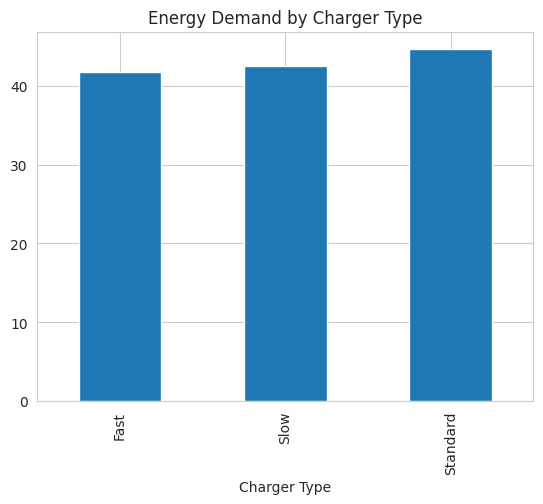

In [63]:
charger_demand.plot(kind='bar', title='Energy Demand by Charger Type')

**Advanced Analysis (SQL-like Analysis using Python)**

In [64]:
#Which hours have the highest charging demand?
hourly_demand = (
    df_clean.groupby('charging_hour')['session_count']
    .sum()
    .reset_index()
    .sort_values(by='session_count', ascending=False)
)

hourly_demand.head()

,charging_hour,session_count
2,2,53
8,8,50
17,17,50
3,3,49
11,11,49


In [65]:
#Peak vs Off-Peak demand comparison
peak_demand = (
    df_clean.groupby('peak_period')['session_count']
    .sum()
    .reset_index()
)

peak_demand

,peak_period,session_count
0,Off-Peak,700
1,Peak,431


In [66]:
#Which cities have the highest EV charging demand?
city_demand = (
    df_clean.groupby('station_city')['session_count']
    .sum()
    .reset_index()
    .sort_values(by='session_count', ascending=False)
)

city_demand.head(10)

,station_city,session_count
2,Los Angeles,250
1,Houston,229
4,San Francisco,221
3,New York,220
0,Chicago,211


In [67]:
#Energy demand by city (kWh)
city_energy_demand = (
    df_clean.groupby('station_city')['energy_demand_kwh']
    .sum()
    .reset_index()
    .sort_values(by='energy_demand_kwh', ascending=False)
)

city_energy_demand.head(10)

,station_city,energy_demand_kwh
2,Los Angeles,10535.628947
1,Houston,10253.875590
3,New York,9328.496585
4,San Francisco,9250.655503
0,Chicago,9168.964000


In [68]:
#Weekday vs Weekend charging behavior
weekday_demand = (
    df_clean.groupby('charging_weekday')['session_count']
    .sum()
    .reset_index()
    .sort_values(by='session_count', ascending=False)
)

weekday_demand

,charging_weekday,session_count
2,Saturday,167
1,Monday,164
5,Tuesday,164
0,Friday,161
4,Thursday,161
6,Wednesday,160
3,Sunday,154


In [69]:
#Demand by user type
user_type_demand = (
    df_clean.groupby('User Type')['session_count']
    .sum()
    .reset_index()
    .sort_values(by='session_count', ascending=False)
)

user_type_demand

,User Type,session_count
1,Commuter,404
2,Long-Distance Traveler,381
0,Casual Driver,346


In [70]:
#Charger type utilization
charger_usage = (
    df_clean.groupby('Charger Type')['session_count']
    .sum()
    .reset_index()
    .sort_values(by='session_count', ascending=False)
)

charger_usage

,Charger Type,session_count
1,Slow,397
0,Fast,369
2,Standard,365


In [71]:
#Monthly demand trend (Time-Series)
monthly_demand = (
    df_clean.groupby(['charging_year', 'charging_month'])['session_count']
    .sum()
    .reset_index()
    .sort_values(['charging_year', 'charging_month'])
)

monthly_demand.head()

,charging_year,charging_month,session_count
0,2024,1,637
1,2024,2,494


In [72]:
df_clean.to_csv("/content/ev_charging_patterns.csv", index=False)

In [73]:
from google.colab import files
files.download("/content/ev_charging_patterns.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>